In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from QAOAKit import (
    opt_angles_for_graph,
    get_fixed_angles,
    get_graph_id,
    get_graph_from_id,
    angles_to_qaoa_format,
    beta_to_qaoa_format,
    gamma_to_qaoa_format,
    angles_to_qiskit_format,
    angles_to_qtensor_format,
    get_3_reg_dataset_table,
    get_3_reg_dataset_table_row,
    get_full_qaoa_dataset_table_row,
    get_full_qaoa_dataset_table,
    get_fixed_angle_dataset_table,
    get_fixed_angle_dataset_table_row,
    qaoa_maxcut_energy,
    noisy_qaoa_maxcut_energy,
    angles_from_qiskit_format,

)

In [ ]:
# check the QAOAKit dataset
reg3s = get_3_reg_dataset_table()
print(reg3s.columns)
reg3s.dropna(subset=['C_opt'], how='any')
reg3s.head(10)

In [2]:
# ! accumulate all the data frame, already done, comment them
# df_paths = ["count_optima_for_one_graph_df/2022-06-01_21:12:14_count_optima_for_one_graph_p=2,3,4.p",
#             "count_optima_for_one_graph_df/2022-06-02_15:30:39_count_optima_for_one_graph_p=5.p",
#             "count_optima_for_one_graph_df/2022-06-02_15:31:28_count_optima_for_one_graph_p=6.p"
#             ]
# df = pd.read_pickle(df_paths[0])
# for path in df_paths[1:]:
#     tmp = pd.read_pickle(path)
#     df = df.append(tmp)

# print(len(df))
# df.to_pickle("count_optima_for_one_graph_df/06-03_count_optima_for_one_graph_p=1-6.p")

# ! read directly from this data frame
df = pd.read_pickle("count_optima_for_one_graph_df/06-03_count_optima_for_one_graph_p=1-6.p")
print(len(df))

35


In [ ]:
df.head(5)

In [ ]:
# 1. take product of n_optima_list
# 2. take mean value of n_optima_list

def Pi(a):
    prod = 1.0
    for i in a:
        prod *= i
    return prod

df["prod_n_optima"] = df.apply(
    lambda x: Pi(x["n_optima_list"]), axis=1
)

df["avg_n_optima"] = df.apply(
   lambda x: np.mean(x["n_optima_list"]), axis=1
)

df.head()

In [ ]:
avg = df.groupby('p').agg({'prod_n_optima': 'mean', 'avg_n_optima': 'mean'})
avg

In [23]:
df["p"].value_counts()

2    7
3    7
4    7
5    7
6    7
Name: p, dtype: int64

In [24]:
df["n_qubits"].value_counts()

4     5
6     5
8     5
10    5
12    5
14    5
16    5
Name: n_qubits, dtype: int64

In [ ]:
newdf = df.groupby(by=["n_qubits", "p"]).size()
newdf

In [ ]:
# https://blog.51cto.com/u_15069477/4257711
newdf = df.groupby(by=["n_qubits", "p"], as_index=False).agg({'prod_n_optima': 'mean', 'avg_n_optima': 'mean'})
newdf

In [ ]:
# for given graph

fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for n_qubits in range(4, 17, 2):
    tmp = df[df["n_qubits"]==n_qubits]
    # tmp = df.loc[(df["n_qubits"]==n_qubits) & (df["p"]>=2)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"nQ={n_qubits}")
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"nQ={n_qubits}")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("p")
# ax.set_title('')
ax.legend()

In [ ]:
fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for n_qubits in range(4, 17, 2):
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    tmp = newdf.loc[(newdf["n_qubits"]==n_qubits) & (newdf["p"]>=2)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"nQ={n_qubits}")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("p")
# ax.set_title('')
ax.legend()

# fig.colorbar(c, ax=ax)
# fig.savefig(f'{figdir}/varIndices={var1_idx},{var2_idx}_nOpt{cnt_opt}.png')
# plt.close(fig)

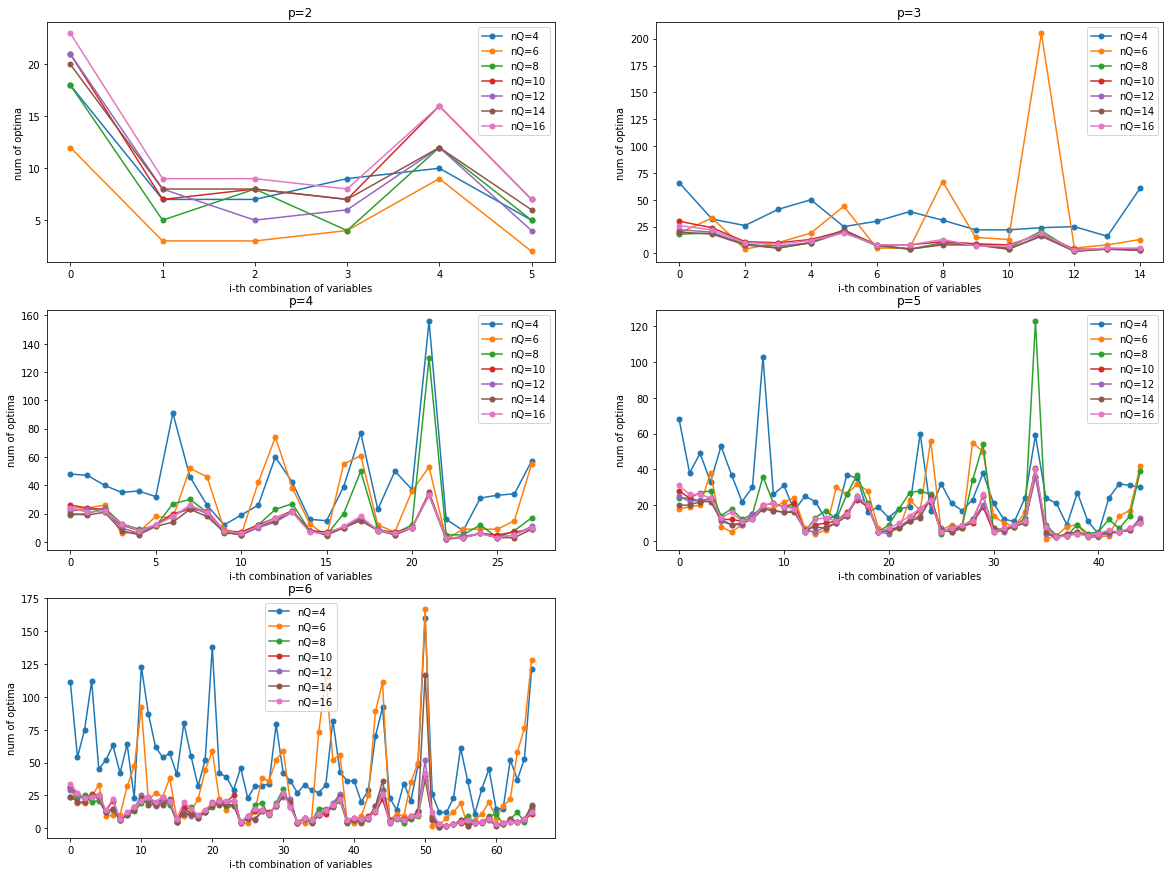

In [22]:
# fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
fig = plt.figure(figsize=[20, 15])
cnt = 1
for p in range(2, 7):
    # tmp = df[df["n_qubits"]==n_qubits]
    plt.subplot(3, 2, cnt)
    tmp = df[df["p"]==p]
    # tmp = df.loc[(df["p"]==p) & (df["n_qubits"]>=8)]
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    # fig, ax = plt.subplots()
    # plt.
    for n_qubits in range(4, 17, 2):
        n_optima_list = tmp[tmp["n_qubits"]==n_qubits].iloc[0]["n_optima_list"]
        # print(n_optima_list)

        # ax.plot(range(len(n_optima_list)), n_optima_list, marker="o", markersize=5, label=f"p={p}")
        plt.plot(range(len(n_optima_list)), n_optima_list, marker="o", markersize=5, label=f"nQ={n_qubits}")
    
    plt.ylabel("num of optima")
    plt.xlabel("i-th combination of variables")
    plt.title(f"p={p}")
    # ax.set_ylabel("num of optima")
    # ax.set_xlabel("i-th combination of variables")
    # ax.set_title('')
    # ax.legend()
    plt.legend()

    cnt += 1
    
plt.show()
# plt.suptitle("distribution of n_optima on combinations of params.png")

# fig.colorbar(c, ax=ax)
plt.savefig(f'distribution of n_optima on combination of params.pdf')
# plt.close(fig)
plt.close()

In [ ]:
# 

fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for p in range(2, 7):
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    tmp = newdf.loc[(newdf["p"]==p) & (newdf["n_qubits"]>=8)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["n_qubits"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"p={p}")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("# qubits")
# ax.set_title('')
ax.legend()

In [ ]:
# count optima for a specific graph
# for a given graph, it will have many p-s
df.groupby(by=["row_id"]).size()

In [ ]:
# below are some test for grid graph, ignore
G = nx.grid_2d_graph(4, 4)
len(G)
nx.draw_networkx(G)

In [ ]:
G = nx.grid_graph(dim=(range(7, 9), range(3, 6)))
len(G)
nx.draw_networkx(G)